In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
rng = np.random.default_rng()

# Problem 3.5 (Sampling from an SCM)

Consider the SCM
$$ 
X := Y^2 + N_X \\
Y := N_Y
$$ 

with $N_X, N_Y \sim^{iid} \mathcal{N}(0, 1)$.

Generate an i.i.d. sample of size 200 from the joint distribution $(X, Y)$

In [4]:
n_obs = 200
Ny = rng.normal(loc=0, scale=1, size=n_obs)
Nx = rng.normal(loc=0, scale=1, size=n_obs)

In [5]:
Y = Ny
X = Y**2 + Nx

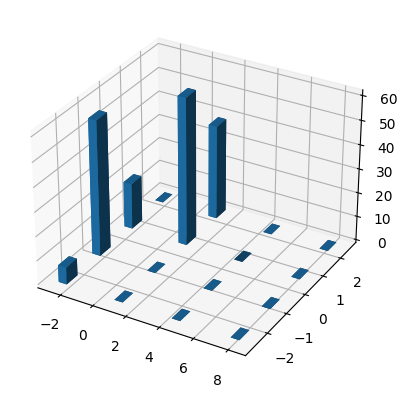

In [6]:
x_min = np.min(X)
x_max = np.max(X)
y_min = np.min(Y)
y_max = np.max(Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(X, X, bins=4, range=[[x_min, x_max], [y_min, y_max]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

# Problem 3.6 (Conditional distributions)

Show that $P^\mathfrak{C}_{C|E=2}$ in Equation (3.4) is a Gaussian distribution:

$$
C|E = 2 \sim \mathcal{N}\left(\frac{8}{17}, \sigma^2 = \frac{1}{17}\right).
$$

The definition of the SCM is:

$$ 
C := N_C \\
E := 4 \cdot C + N_E
$$ 

with $N_C, N_E \sim^{iid} \mathcal{N}(0, 1)$, implying that:

$E \sim \mathcal{N}(0, 17)$.

By construction, $C$ and $E$ are bivariate normally distributed random variables, implying their standardized versions are also bivariate normally distributed with the same correlation coefficient. Let us now find the correlation coefficient:

$ cov(C, E) = cov(N_C, 4 \cdot N_C + N_E) =  cov(N_C, 4 \cdot N_C) + cov(N_C, N_E) = \\ cov(N_C, 4 \cdot N_C) = 4 \cdot cov(N_C, N_C) = 4 \cdot 1 = 4$ 

$corr(C, E) = \frac{cov(C, E)}{\sigma_C \sigma_E} = \frac{4}{1 \cdot \sqrt{17}}= \frac{4}{\sqrt{17}} = \rho$.

The standardized versions of $C$ and $E$ are:

$$
X := \frac{C - \mu_C}{\sigma_C} = \frac{C - 0}{1} = C \\
Y := \frac{E - \mu_E}{\sigma_E} = \frac{E - 0}{\sqrt{17}} = \frac{E}{\sqrt{17}}
$$

With $E$ equal to 2, we have that $Y$ is $\frac{2}{\sqrt{17}}$. Using the equations for conditional distributions for bivariate standard normal random variables, we have that:

$$
X|Y=y \sim \mathcal{N}\left(\rho \cdot y, 1-\rho^2 \right) \implies \\
X|Y=\frac{2}{\sqrt{17}} \sim \mathcal{N}\left(\frac{4}{\sqrt{17}} \cdot \frac{2}{\sqrt{17}}, 1 - \left(\frac{4}{\sqrt{17}} \right)^2\right) \implies\\
X|Y=\frac{2}{\sqrt{17}} \sim \mathcal{N}\left(\frac{8}{17}, 1 - \frac{16}{17} \right) \implies \\
X|Y=\frac{2}{\sqrt{17}} \sim \mathcal{N}\left(\frac{8}{17}, \frac{1}{17} \right) 
$$

Since $X$ is the same as $C$, we do not need to transform $X$ to get $C$ and this is the distribution we wanted to find.

# Problem 3.7 (Interventions)


Assume that we know that a process either follows the SCM

$$
X := Y + N_X \\
Y := N_Y,
$$

where $N_X \sim \mathcal{N}(\mu_X, \sigma_X^2)$ and $N_Y \sim \mathcal{N}(\mu_Y, \sigma_Y^2)$ with unknown $\mu_X, \mu_Y$ and $\sigma_X, \sigma_Y > 0$, or it follows the SCM

$$
X := M_X \\
Y := X + M_Y,
$$

where $M_X \sim \mathcal{N}(\nu_X, \tau_X^2)$ and $M_Y \sim \mathcal{N}(\nu_Y, \tau_Y^2)$ with unknown $\nu_X, \nu_Y$ and $\tau_X, \tau_Y > 0$.

Is there a single intervention distribution that lets you distinguish between the two SCMs?

Answer:

The first SCM (SCM1) corresponds to the graph $Y \rightarrow X$ whereas the second SCM (SCM2) corresponds to the graph $X \rightarrow Y$. If we could obtain the intervention distribution describing the effect on $X$ of changing $Y$, we would be able to see whether changing $X$ changes $Y$. If that is the case, this would be evidence for SCM2, otherwise SCM1 must hold.

# Problem 3.8 (Cyclic SCMs)

a) SCM1:

$$
X := 2 \cdot Y + N_X \\
Y := 2 \cdot X + N_Y
$$

with $(N_X, N_Y)\sim P$ for an arbitrary distribution $P$. Compute $\alpha, \beta, \gamma, \delta$ such that

$$
X := \alpha N_X + \beta N_Y \\
Y := \gamma N_X + \delta N_Y
$$

Answer:
By isolating $X$ and $Y$, we find that $\alpha = \frac{-1}{3}$, $\beta=\frac{-2}{3}$, $\gamma=\frac{-2}{3}$, and $\delta=\frac{-1}{3}$.

b) SCM2:

$$
X := Y + N_X \\
Y := X + N_Y
$$

with $(N_X, N_Y)\sim P$. Show that if $P$ allows for a density with respect to Lebesgue measure and factorizes, that is, $N_X$ and $N_Y$ are independent, then there is no solution $(X, Y, N_X, N_Y)$ of the SCM.

Answer:
Substituting the expression for $Y$ in $X$, we find:

$$
X = X + N_Y + N_X \implies N_Y = -N_X.
$$

Hence the only way for SCM2 to hold is if $N_Y$ and $N_X$ are negatives of each other, which is not possible if they are independent.

Define $P$ as $(Z, -Z)$, where Z is a standard normally distributed random variable, i.e. $N_X \sim \mathcal{N}(0, 1)$ and $N_Y = -N_X$. 

Let $X := \alpha N_X \implies Y := \alpha N_X - N_X \implies Y = (\alpha - 1)N_X$. So the vector $(\alpha N_X, (\alpha - 1)N_X, N_X, -N_X)$ solves the SCM. A concrete example is $(2 N_X, N_X, N_X, -N_X)$.